### <font color = blue> Task 1:THE SPARKS FOUNDATION May'21 </font>

### PREDICTION USING SUPERVISED ML

#### Task Description:

This is a Simple Linear Regression Problem where we have to predict the **Percentage of students** based on the numbers of their study hours

#### Objective:

We have to Predict the **score** of a student if he/she devotes 9.25hours/day for studies.

#### <font color=green> **DONE BY- ZUBAIR SHEIKH** </font>

**The Steps we will cover in this task as follows:**
1. Reading and Understanding the data.
2. Visualising Data for better insights.
3. Preparing the data for modelling (Train-Test Split, Rescaling)
4. Training the model.
5. Prediction and Evaluation on Test Data Set.

**THe Dataset Contains Following Variables:**
   - **HOURS** - No. of hours of study by students.
   - **SCORES** - Marks obtained by a students.

### <font color=blue> 1.Reading and Understanding the Data </font>

**Importing Warnings & important Libraries to read students dataset.**

In [1]:
### Import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing Important Libraries

import numpy as np
import pandas as pd

In [3]:
### Reading Dataset

scores = pd.read_csv("student_scores - student_scores.csv")
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
### Checking Data size

scores.shape

(25, 2)

In [5]:
### Data Info

scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**NOTE:** <font color=red> No Missing Values Present in Dataset. </font>

### <font color=blue> 2. Data Visualization </font>

In [6]:
### Importing Visualisation Libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Here Dependent Variable is Scores, So we are going to keep it in Y-axis**

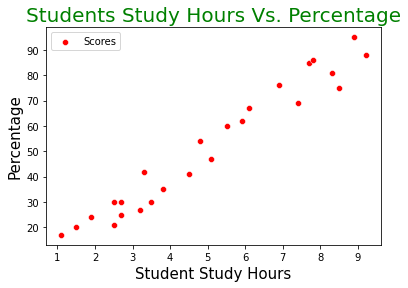

In [7]:
### Visualising the scores and hours variables

sns.scatterplot(x='Hours', y='Scores', data=scores, color='red')
plt.title('Students Study Hours Vs. Percentage', color='green', fontsize=20)
plt.xlabel('Student Study Hours', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.legend(['Scores'])
plt.show()

**NOTE:** <font color=red> Scores of students are increasing with increase in number of study hours </font>

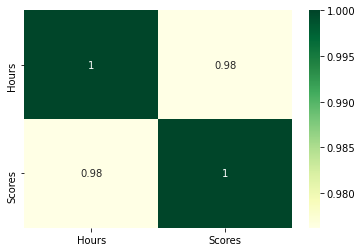

In [8]:
### Heatmap to check correlation between variables

sns.heatmap(scores.corr(),annot=True,cmap='YlGn')
plt.show()

**we get good correlation percentage between scores and hours variable**

#### <font color = red> So, Yes we can consider a Simple Linear Regression Model. </font>

### <font color=blue> 3. Data Preparation for Model Building </font>

In [9]:
### Dataset Preview

scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### <font color=blue> Train Test split: </font>

In [10]:
### Importing libraries for train-test split

import sklearn
from sklearn.model_selection import train_test_split

**Assigning Feature Variable "hours" to variable X and response varaible "Scores" to variable y**

In [11]:
X = scores.iloc[:, :-1].values  
y = scores.iloc[:, 1].values  

In [12]:
### Creating Train-Test Split:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70, random_state=100)

In [13]:
### Let's now take a look at train dataset

X_train.shape

(17, 1)

In [14]:
y_train.shape

(17,)

In [15]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### <font color=blue> 4. Training the Model </font>

**We split our dataset into training and testing data, now going to train the model.**

In [16]:
### Importing Linear Regression Libraries

from sklearn.linear_model import LinearRegression

In [17]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lm.fit()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
### Getting intercept and coeffecients


print('Training Complete!!')
print('Trained Paramters..')
r_sq = lm.score(X_train,y_train)
print('coefficient of determination', r_sq)
print('Intercept:',lm.intercept_)
print('Slope:',lm.coef_)

Training Complete!!
Trained Paramters..
coefficient of determination 0.9570735354094693
Intercept: 1.495142109236383
Slope: [9.87171443]


**The following Linear Equation we get from the above analysis-**
   - <font color=red> Scores = 1.495 + 9.871 * hours </font>

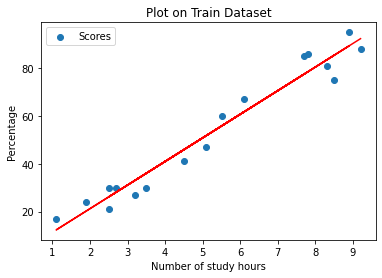

In [19]:
### Plotting the regression line

slope = lm.coef_
intercept = lm.intercept_

reg = slope*X_train + intercept

plt.scatter(X_train,y_train)
plt.title('Plot on Train Dataset')
plt.xlabel('Number of study hours')
plt.ylabel('Percentage')
plt.legend(['Scores'])
plt.plot(X_train,reg, 'r')
plt.show()

**Now we trained our model, now its time to make prediction**

### <font color=blue> 5. Prediction and Evaluation on Test Dataset </font>

In [20]:
### Comparing the actual and predicted values for the test dataset

y_predicted = lm.predict(X_test)
df = pd.DataFrame({'y_Actual':y_test, 'y_predicted': y_predicted})
df

,y_Actual,y_predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


#### <font color=blue> Evaluating the Model </font>

In [21]:
from sklearn import metrics

print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_predicted))
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test,y_predicted))

Mean Squared Error : 25.678419573283865
Mean Absolute Error : 4.762517892332275


In [22]:
print('The R^2 value for training dataset :', lm.score(X_train,y_train))
print('The R^2 value for test dataset :', lm.score(X_test,y_test))
print("it's perfect !!!")

The R^2 value for training dataset : 0.9570735354094693
The R^2 value for test dataset : 0.9309458862687437
it's perfect !!!


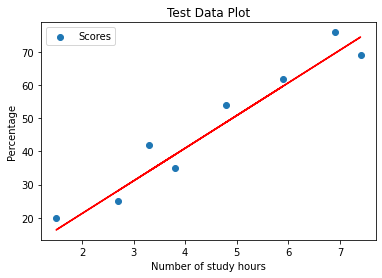

In [23]:
reg = slope*X_test + intercept

plt.scatter(X_test,y_test)
plt.title('Test Data Plot')
plt.xlabel('Number of study hours')
plt.ylabel('Percentage')
plt.legend(['Scores'])
plt.plot(X_test,reg, 'r')
plt.show()

### WHAT WILL BE THE SCORE IF A STUDENT STUDIES FOR 9.25 HOURS/DAY ??

In [24]:
hour = 9.25
my_pred = lm.predict([[hour]])
print('For 9.25 hours of study per day, this model predicts that the student will score', my_pred[0])

For 9.25 hours of study per day, this model predicts that the student will score 92.80850057353504


#### Evaluating score with the help of linear equation :

In [25]:
hours = 9.25
Scores = 1.495 + 9.871 * hours
Scores

92.80175000000001

In [26]:
import jovian

In [27]:
project_name = 'Students_Score Prediction'

In [ ]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
